In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.api as sm

geyser = sm.datasets.get_rdataset(dataname='geyser', package='MASS')
geyser.data

,waiting,duration
0,80,4.016667
1,71,2.150000
2,57,4.000000
3,80,4.000000
4,75,4.000000
...,...,...
294,52,4.083333
295,85,2.066667
296,58,4.000000
297,88,4.000000


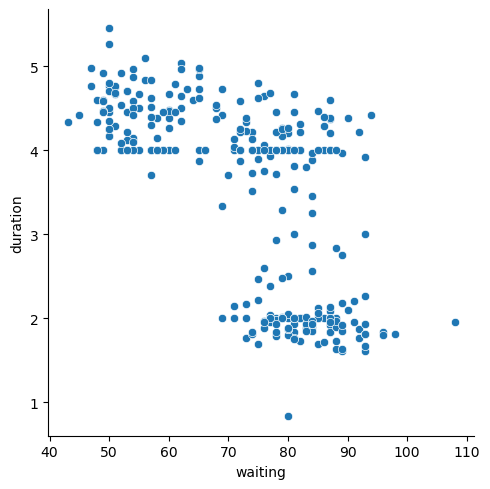

In [3]:
sns.relplot(x='waiting', y='duration', data=geyser.data)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(geyser.data)
kmeans.cluster_centers_

array([[81.31794872,  2.94324786],
       [55.43269231,  4.43125   ]])

In [5]:
kmeans.labels_[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [6]:
labels = kmeans.fit_predict(geyser.data)
np.array_equal(labels, kmeans.labels_)

True

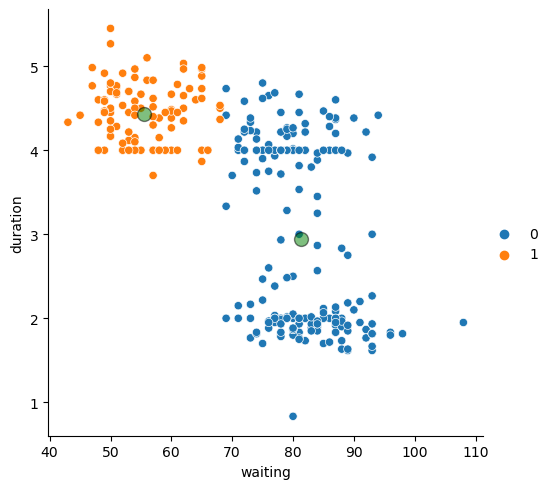

In [7]:
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=geyser.data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], edgecolors='black', alpha=0.5, s=100, c='green')
plt.show()

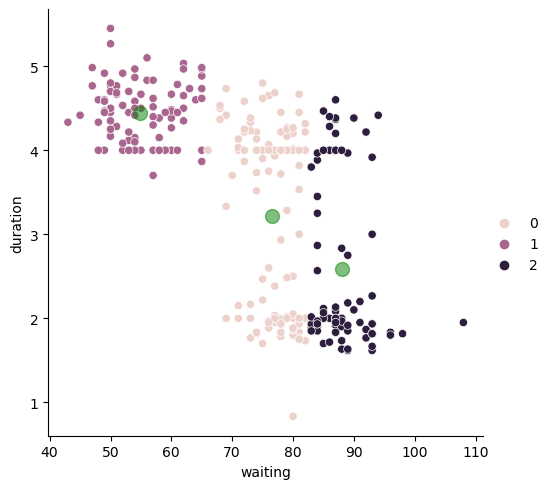

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(geyser.data)
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=geyser.data)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], alpha=0.5, s=100, c='green')
plt.show()

In [9]:
geyser.data.describe()

,waiting,duration
count,299.000000,299.000000
mean,72.314381,3.460814
std,13.890324,1.147904
min,43.000000,0.833333
25%,59.000000,2.000000
50%,76.000000,4.000000
75%,83.000000,4.383333
max,108.000000,5.450000


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(geyser.data)
scaled_geyser = pd.DataFrame(X, index=geyser.data.index, columns=geyser.data.columns)
scaled_geyser

,waiting,duration
0,0.554235,0.485045
1,-0.094784,-1.143834
2,-1.104370,0.470501
3,0.554235,0.470501
4,0.193669,0.470501
...,...,...
294,-1.464936,0.543219
295,0.914801,-1.216552
296,-1.032257,0.470501
297,1.131141,0.470501


<Figure size 640x480 with 0 Axes>

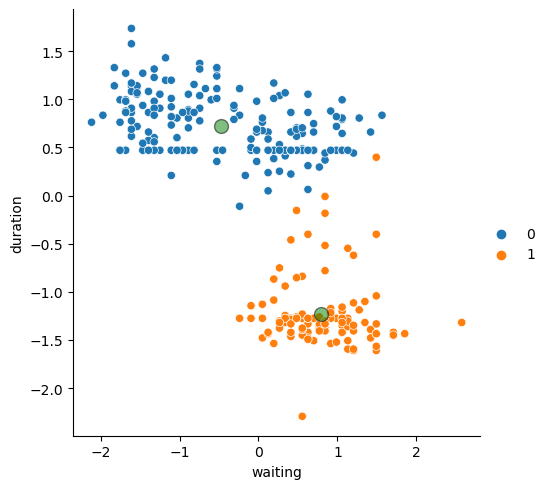

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_geyser)
plt.figure()
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=scaled_geyser)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='green', edgecolors='black', s=100, alpha=0.5)
plt.show()

<Figure size 640x480 with 0 Axes>

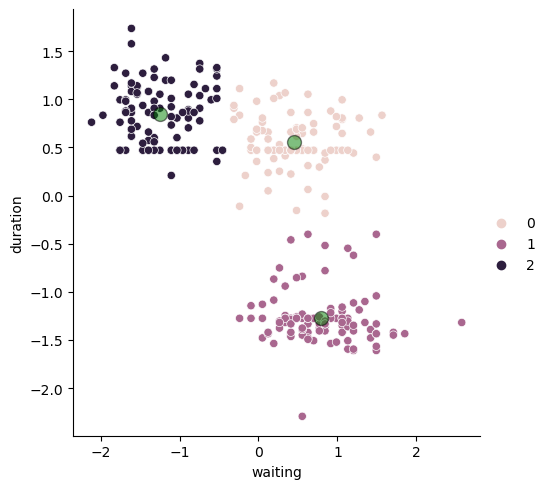

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_geyser)
plt.figure()
sns.relplot(x='waiting', y='duration', hue=kmeans.labels_, data=scaled_geyser)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='green', edgecolors='black', s=100, alpha=0.5)
plt.show()

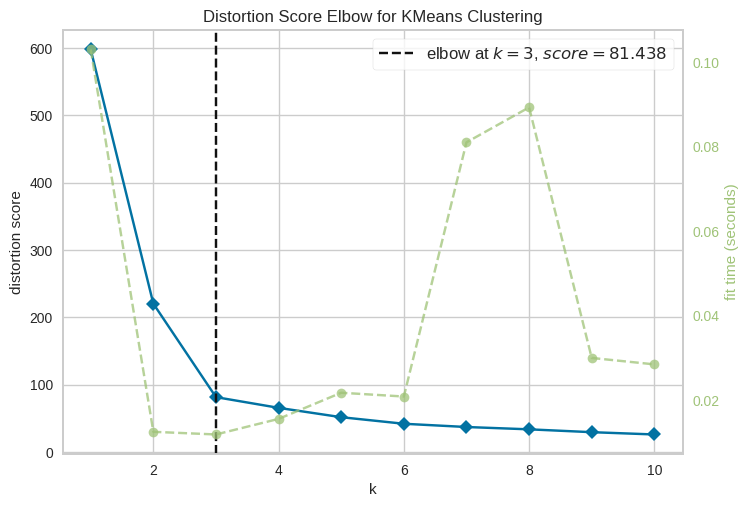

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer

kmeans=KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(scaled_geyser)
visualizer.show()

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

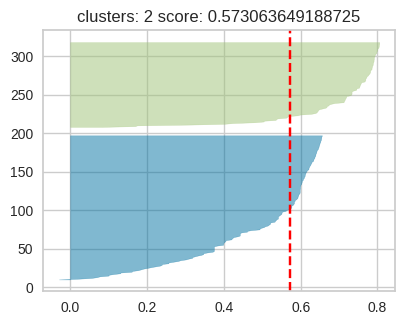

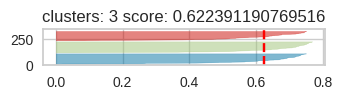

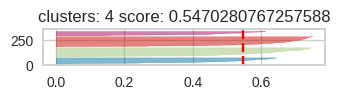

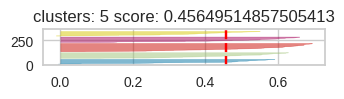

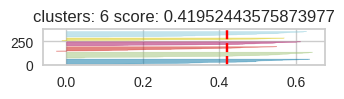

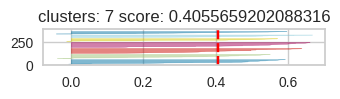

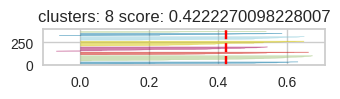

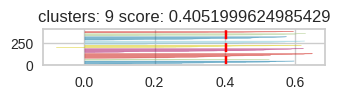

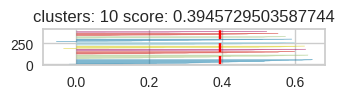

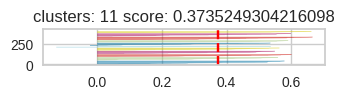

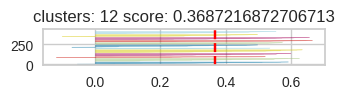

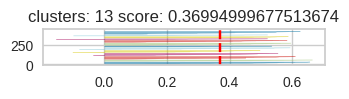

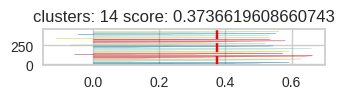

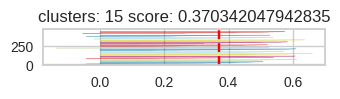

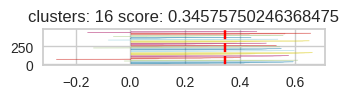

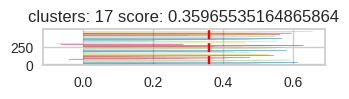

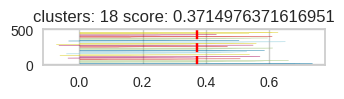

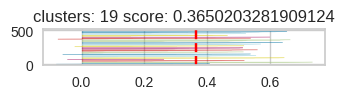

In [15]:

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 20):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scaled_geyser)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')
    plt.show()   
  

In [31]:
sorted(scores.items(), reverse=True, key=lambda x: x[1])

[(3, 0.622391190769516),
 (2, 0.573063649188725),
 (4, 0.5470280767257588),
 (5, 0.45649514857505413),
 (8, 0.4222270098228007),
 (6, 0.41952443575873977),
 (7, 0.4055659202088316),
 (9, 0.4051999624985429),
 (10, 0.3945729503587744),
 (14, 0.3736619608660743),
 (11, 0.3735249304216098),
 (18, 0.3714976371616951),
 (15, 0.370342047942835),
 (13, 0.36994999677513674),
 (12, 0.3687216872706713),
 (19, 0.3650203281909124),
 (17, 0.35965535164865864),
 (16, 0.34575750246368475)]